# QUIMB bosonic results plot

In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np

# Load data

In [3]:
with open(r'data/bosonic_results/ed_b_params.pkl', 'rb') as f:
    circuit_ed_b_params = pickle.load(f)

In [4]:
with open(r'data/bosonic_variational_unitary_circuits_ed/overlaps.pkl', 'rb') as f:
    circuit_ed_overlaps = pickle.load(f)

In [5]:
with open(r'data/bosonic_variational_unitary_circuits_ed/mean_proj_rep_angle.pkl', 'rb') as f:
    circuit_ed_mean_gauge_invariant_proj_rep_angle = pickle.load(f)
with open(r'data/bosonic_variational_unitary_circuits_ed/error_proj_rep_angle.pkl', 'rb') as f:
    circuit_ed_error_gauge_invariant_proj_rep_angle = pickle.load(f)

In [6]:
with open(r'data/bosonic_results/b_params.pkl', 'rb') as f:
    circuit_mps_b_params = pickle.load(f)

In [7]:
with open(r'data/bosonic_variational_unitary_circuits/overlaps.pkl', 'rb') as f:
    circuit_mps_overlaps = pickle.load(f)

In [8]:
with open(r'data/bosonic_variational_unitary_circuits/mean_proj_rep_angle.pkl', 'rb') as f:
    circuit_mps_mean_gauge_invariant_proj_rep_angle = pickle.load(f)
with open(r'data/bosonic_variational_unitary_circuits/error_proj_rep_angle.pkl', 'rb') as f:
    circuit_mps_error_gauge_invariant_proj_rep_angle = pickle.load(f)

In [16]:
with open(r'data/bosonic_results/ed_circuit_b_params_2_site.pkl', 'rb') as f:
    svd_ed_b_params = pickle.load(f)

with open(r'data/bosonic_results/ed_circuit_mean_gauge_invariant_proj_rep_angle_2_site.pkl', 'rb') as f:
    svd_ed_mean_gauge_invariant_proj_rep_angle = pickle.load(f)

with open(r'data/bosonic_results/ed_circuit_error_gauge_invariant_proj_rep_angle_2_site.pkl', 'rb') as f:
    svd_ed_error_gauge_invariant_proj_rep_angle = pickle.load(f)

with open(r'data/bosonic_results/ed_circuit_overlaps_2_site.pkl', 'rb') as f:
    svd_ed_overlaps = pickle.load(f)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [17]:
with open(r'data/bosonic_results/mps_svd_b_params.pkl', 'rb') as f:
    svd_mps_b_params = pickle.load(f)

with open(r'data/bosonic_results/mps_svd_mean_gauge_invariant_proj_rep_angle.pkl', 'rb') as f:
    svd_mps_mean_gauge_invariant_proj_rep_angle = pickle.load(f)

with open(r'data/bosonic_results/mps_svd_error_gauge_invariant_proj_rep_angle.pkl', 'rb') as f:
    svd_mps_error_gauge_invariant_proj_rep_angle = pickle.load(f)

with open(r'data/bosonic_results/mps_svd_overlaps.pkl', 'rb') as f:
    svd_mps_overlaps = pickle.load(f)

In [18]:
svd_mps_b_params = np.delete(svd_mps_b_params, 10)
svd_mps_overlaps = np.delete(svd_mps_overlaps, 10, axis=0)
svd_mps_mean_gauge_invariant_proj_rep_angle = np.delete(svd_mps_mean_gauge_invariant_proj_rep_angle, 10, axis=0)
svd_mps_error_gauge_invariant_proj_rep_angle = np.delete(svd_mps_error_gauge_invariant_proj_rep_angle, 10, axis=1)

# Plot

In [13]:
colors = [
    'tab:blue',
    'tab:orange',
    'tab:green'
]

symmetry_labels = [
    'II',
    'IX',
    'XI',
    'XX'
]

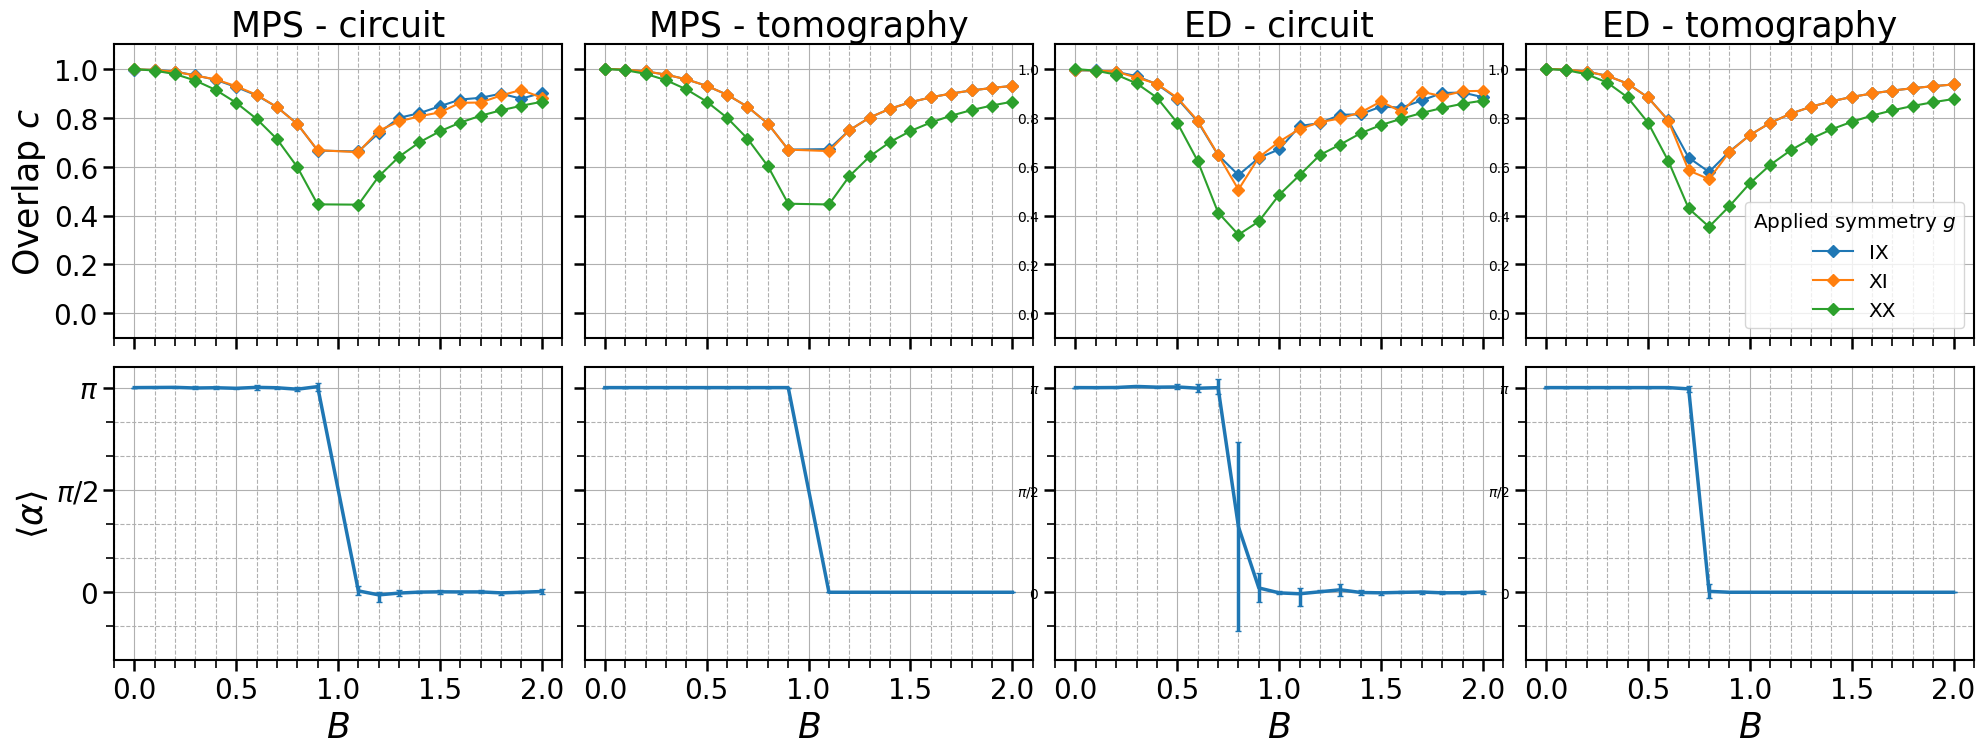

In [27]:
figure_label_fontsize=25
y_tick_label_fontsize=20
y_label_fontsize=25
x_tick_label_fontsize=20
x_label_fontsize=25
row_label_fontsize=25

axis_spine_linewidth = 1.5

major_tick_length = 8
major_tick_width = 1.8
minor_tick_length = 6
minor_tick_width = 1.2

phase_linewidth = 2.5

fig, ax_grid = plt.subplots(figsize=(24, 8), ncols=4, nrows=2)

for j, (col, label) in enumerate(zip(colors, symmetry_labels[1:])):
    ax_grid[0][0].plot(
        circuit_mps_b_params,
        circuit_mps_overlaps[:, j],
        color=col,
        label=label,
        marker='D'
    )

    ax_grid[0][1].plot(
        svd_mps_b_params,
        svd_mps_overlaps[:, j],
        color=col,
        label=label,
        marker='D'
    )

    ax_grid[0][2].plot(
        circuit_ed_b_params,
        circuit_ed_overlaps[:, j],
        color=col,
        label=label,
        marker='D'
    )

    ax_grid[0][3].plot(
        svd_ed_b_params,
        svd_ed_overlaps[:, j],
        color=col,
        label=label,
        marker='D'
    )

ax_grid[1][0].errorbar(
    circuit_mps_b_params,
    circuit_mps_mean_gauge_invariant_proj_rep_angle,
    yerr=circuit_mps_error_gauge_invariant_proj_rep_angle,
    color='tab:blue',
    fmt='-',
    capsize=2,
    linewidth=phase_linewidth
)

ax_grid[1][1].errorbar(
    svd_mps_b_params,
    svd_mps_mean_gauge_invariant_proj_rep_angle,
    yerr=svd_mps_error_gauge_invariant_proj_rep_angle,
    color='tab:blue',
    fmt='-',
    capsize=2,
    linewidth=phase_linewidth
)

ax_grid[1][2].errorbar(
    circuit_ed_b_params,
    circuit_ed_mean_gauge_invariant_proj_rep_angle,
    yerr=circuit_ed_error_gauge_invariant_proj_rep_angle,
    color='tab:blue',
    fmt='-',
    capsize=2,
    linewidth=phase_linewidth
)

ax_grid[1][3].errorbar(
    svd_ed_b_params,
    svd_ed_mean_gauge_invariant_proj_rep_angle,
    yerr=svd_ed_error_gauge_invariant_proj_rep_angle,
    color='tab:blue',
    fmt='-',
    capsize=2,
    linewidth=phase_linewidth
)

for i in range(4):
    ax_grid[0][i].set_ylim(-0.1, 1.1)
    ax_grid[1][i].set_ylim(-np.pi/3, np.pi*(1.1))

for i, ax_row in enumerate(ax_grid):
    for j, ax in enumerate(ax_row):
        ax.xaxis.set_major_locator(
            matplotlib.ticker.MultipleLocator(0.5)
        )
        ax.xaxis.set_minor_locator(
            matplotlib.ticker.MultipleLocator(0.1)
        )

        #ax.grid()

        ax.grid(
            which='major',
            axis='both',
            zorder=-1e10
        )
        
        ax.grid(
            which='minor',
            axis='both',
            linestyle='--',
            zorder=-1e10
        )

        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(axis_spine_linewidth)

        ax.tick_params(
            axis='both',
            which='major',
            length=major_tick_length,
            width=major_tick_width
        )

        ax.tick_params(
            axis='both',
            which='minor',
            length=minor_tick_length,
            width=minor_tick_width
        )

        if i == 0:
            if j == 0:
                ax.title.set_text(rf'MPS - circuit')
            elif j == 1:
                ax.title.set_text(rf'MPS - tomography')
            if j == 2:
                ax.title.set_text(rf'ED - circuit')
            elif j == 3:
                ax.title.set_text(rf'ED - tomography')
            ax.title.set_fontsize(figure_label_fontsize)
    
            ax.yaxis.set_major_locator(
                matplotlib.ticker.MultipleLocator(0.2)
            )

        if i == 1:
            ax.set_yticks(
                np.linspace(0, np.pi, 3),
                labels=['$0$', '$\pi/2$', '$\pi$']
            )
            
            ax.set_yticks(
                [-np.pi/6, np.pi/6, np.pi/3, 2*np.pi/3, 5*np.pi/6],
                minor=True
            )

            ax.set_xlabel('$B$', fontsize=x_label_fontsize)

            ax.tick_params(
                axis='x',
                which='major',
                labelsize=x_tick_label_fontsize
            )
        """
            ax.grid(
                which='minor',
                axis='y',
                linestyle='--',
                zorder=-1e10
            )
        """
        if j == 0:
            ax.tick_params(
                axis='y',
                which='major',
                labelsize=y_tick_label_fontsize
            )

        if j == 1:
            ax.set_yticklabels([])
            ax.yaxis.set_label_position("right")
        if i!= 1:
            ax.set_xticklabels([])

ax_grid[0][0].set_ylabel(r'Overlap $c$', fontsize=y_label_fontsize)
ax_grid[1][0].set_ylabel(r'$\langle \alpha \rangle$', fontsize=y_label_fontsize)

for i, l in enumerate('ab'):
    ax_grid[i][1].set_ylabel(
        f'({l})',
        fontsize=row_label_fontsize,
        rotation='horizontal',
        ha='left',
        labelpad=13
    )

ax_grid[0][3].legend(
    loc='lower right',
    title='Applied symmetry $g$',
    fontsize='x-large',
    title_fontsize='x-large'
)

fig.subplots_adjust(wspace=0.05, hspace=0.1)

fig.savefig(
    r'plots/all_bosonic_results.png',
    dpi=200,
    bbox_inches='tight'
)